In [1]:
import matplotlib.pyplot as plt
import gmaps
import pandas as pd
import requests
import numpy as np
import datetime

In [2]:
url = "https://data.cityofchicago.org/resource/tdab-kixi.json"
r = requests.get(url)
r

<Response [200]>

In [3]:
# call json
json = r.json()

In [4]:
# check what type of data the json file has
type(json)

list

In [5]:
# create a data frame from the json file
df = pd.DataFrame(json)
df.head(2)

,landmark_name,id,address,landmark_designation_date,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux,date_built,architect
0,Vassar Swiss Underwear Company Building,L-265,2543 - 2545 W Diversey Av,2008-07-30T07:00:00.000Z,41.93162660840,-87.69210009570,"{'latitude': '41.9316266084', 'longitude': '-8...",1,23,22535,240,40,24,NaN,NaN
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991-10-02T07:00:00.000Z,41.81925575100,-87.60278799920,"{'latitude': '41.819255751', 'longitude': '-87...",36,2,4301,220,10,1,1886,Adler & Sullivan


In [6]:
# drop uncecessary columns
# #1 -using column name
# df2= df.drop(columns= [':@computed_region_rpca_8um6', ':@computed_region_vrxf_vc4k', ':@computed_region_6mkv_f3dw', ':@computed_region_bdys_3d7i',':@computed_region_43wa_7qmu', ':@computed_region_awaf_s7ux' ], axis = 1)
# df2

#2 - using column index number - much easier since you don't have to copy/paste the namae of the column
df2 = df.drop(df.columns[[7,8,9,10,11,12]], axis = 1)
df2.head(2)


,landmark_name,id,address,landmark_designation_date,latitude,longitude,location,date_built,architect
0,Vassar Swiss Underwear Company Building,L-265,2543 - 2545 W Diversey Av,2008-07-30T07:00:00.000Z,41.93162660840,-87.69210009570,"{'latitude': '41.9316266084', 'longitude': '-8...",NaN,NaN
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991-10-02T07:00:00.000Z,41.81925575100,-87.60278799920,"{'latitude': '41.819255751', 'longitude': '-87...",1886,Adler & Sullivan


In [7]:
# convert datetime column to just date
df2['landmark_designation_date'] = pd.to_datetime(df2['landmark_designation_date']).dt.date
df2.head(2)

,landmark_name,id,address,landmark_designation_date,latitude,longitude,location,date_built,architect
0,Vassar Swiss Underwear Company Building,L-265,2543 - 2545 W Diversey Av,2008-07-30,41.93162660840,-87.69210009570,"{'latitude': '41.9316266084', 'longitude': '-8...",NaN,NaN
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991-10-02,41.81925575100,-87.60278799920,"{'latitude': '41.819255751', 'longitude': '-87...",1886,Adler & Sullivan


In [8]:
##

df2['designation_year'] =  pd.DatetimeIndex(df2['landmark_designation_date']).year
df2.head(2)

,landmark_name,id,address,landmark_designation_date,latitude,longitude,location,date_built,architect,designation_year
0,Vassar Swiss Underwear Company Building,L-265,2543 - 2545 W Diversey Av,2008-07-30,41.93162660840,-87.69210009570,"{'latitude': '41.9316266084', 'longitude': '-8...",NaN,NaN,2008.0
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991-10-02,41.81925575100,-87.60278799920,"{'latitude': '41.819255751', 'longitude': '-87...",1886,Adler & Sullivan,1991.0


In [9]:
#remove decimal from 'designation year'
df2['designation_year'] = df2['designation_year'].astype(str).apply(lambda x: x.replace('.0',''))
df2.head(2)

,landmark_name,id,address,landmark_designation_date,latitude,longitude,location,date_built,architect,designation_year
0,Vassar Swiss Underwear Company Building,L-265,2543 - 2545 W Diversey Av,2008-07-30,41.93162660840,-87.69210009570,"{'latitude': '41.9316266084', 'longitude': '-8...",NaN,NaN,2008
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991-10-02,41.81925575100,-87.60278799920,"{'latitude': '41.819255751', 'longitude': '-87...",1886,Adler & Sullivan,1991


In [10]:
#check how many rows in date_built have null values
count_nan = df['date_built'].isnull().sum()
print ('Count of NaN: ' + str(count_nan))
#results= 40

Count of NaN: 40


In [11]:
#drop the empty values
nan_value = float('NaN')
df2.replace('', nan_value, inplace = True)
df2.dropna(inplace = True)
df2.head(2)

,landmark_name,id,address,landmark_designation_date,latitude,longitude,location,date_built,architect,designation_year
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991-10-02,41.81925575100,-87.60278799920,"{'latitude': '41.819255751', 'longitude': '-87...",1886,Adler & Sullivan,1991
2,Manhattan Building,L-139,431 S Dearborn St,1978-07-07,41.87606572340,-87.62896445050,"{'latitude': '41.8760657234', 'longitude': '-8...",1891,William LeBaron Jenney,1978


In [12]:
#make sure all the columns have the same number of rows
df2.count()

landmark_name                270
id                           270
address                      270
landmark_designation_date    270
latitude                     270
longitude                    270
location                     270
date_built                   270
architect                    270
designation_year             270
dtype: int64

In [13]:
#remove decimal from 'designation year'
df2['date_built'] = df2['date_built'].astype(str).apply(lambda x: x.replace(', ','-'))
df2['date_built'] = df2['date_built'].astype(str).apply(lambda x: x.replace('& ','-'))
df2['date_built'] = df2['date_built'].astype(str).apply(lambda x: x.replace('&','-'))
df2['date_built'] = df2['date_built'].astype(str).apply(lambda x: x.replace(',','-'))
df2['date_built'] = df2['date_built'].astype(str).apply(lambda x: x.replace('`','-'))
df2.head(4)

,landmark_name,id,address,landmark_designation_date,latitude,longitude,location,date_built,architect,designation_year
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991-10-02,41.81925575100,-87.60278799920,"{'latitude': '41.819255751', 'longitude': '-87...",1886,Adler & Sullivan,1991
2,Manhattan Building,L-139,431 S Dearborn St,1978-07-07,41.87606572340,-87.62896445050,"{'latitude': '41.8760657234', 'longitude': '-8...",1891,William LeBaron Jenney,1978
3,Machinery Hall at Illinois Institute of Techno...,L- 12,100 W 33rd St,2004-05-26,41.83516141220,-87.62922122350,"{'latitude': '41.8351614122', 'longitude': '-8...",1901,"Patton, Fisher & Miller",2004
4,Melissa Ann Elam House,L- 88,4726 S Dr Martin Luther King Jr Dr,1979-03-21,41.80852976900,-87.61720439490,"{'latitude': '41.808529769', 'longitude': '-87...",1903,Henry L. Newhouse,1979


In [14]:
#split the date_built column 
df2[['start_built_year', 'end_built_year', 'y3']] = df2["date_built"].apply(lambda x: pd.Series(str(x).split("-")))
df2.head(4)

,landmark_name,id,address,landmark_designation_date,latitude,longitude,location,date_built,architect,designation_year,start_built_year,end_built_year,y3
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991-10-02,41.81925575100,-87.60278799920,"{'latitude': '41.819255751', 'longitude': '-87...",1886,Adler & Sullivan,1991,1886,NaN,NaN
2,Manhattan Building,L-139,431 S Dearborn St,1978-07-07,41.87606572340,-87.62896445050,"{'latitude': '41.8760657234', 'longitude': '-8...",1891,William LeBaron Jenney,1978,1891,NaN,NaN
3,Machinery Hall at Illinois Institute of Techno...,L- 12,100 W 33rd St,2004-05-26,41.83516141220,-87.62922122350,"{'latitude': '41.8351614122', 'longitude': '-8...",1901,"Patton, Fisher & Miller",2004,1901,NaN,NaN
4,Melissa Ann Elam House,L- 88,4726 S Dr Martin Luther King Jr Dr,1979-03-21,41.80852976900,-87.61720439490,"{'latitude': '41.808529769', 'longitude': '-87...",1903,Henry L. Newhouse,1979,1903,NaN,NaN


In [15]:
#rearrange the columns
df2 = df2.reindex(['landmark_name','id', 'address', 'designation_year', 'start_built_year','architect', 'location', 'latitude', 'longitude' , 'landmark_designation_date', 'date_built', 'end_built_year', 'y3'], axis=1)
df2.head(4)

,landmark_name,id,address,designation_year,start_built_year,architect,location,latitude,longitude,landmark_designation_date,date_built,end_built_year,y3
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991,1886,Adler & Sullivan,"{'latitude': '41.819255751', 'longitude': '-87...",41.81925575100,-87.60278799920,1991-10-02,1886,NaN,NaN
2,Manhattan Building,L-139,431 S Dearborn St,1978,1891,William LeBaron Jenney,"{'latitude': '41.8760657234', 'longitude': '-8...",41.87606572340,-87.62896445050,1978-07-07,1891,NaN,NaN
3,Machinery Hall at Illinois Institute of Techno...,L- 12,100 W 33rd St,2004,1901,"Patton, Fisher & Miller","{'latitude': '41.8351614122', 'longitude': '-8...",41.83516141220,-87.62922122350,2004-05-26,1901,NaN,NaN
4,Melissa Ann Elam House,L- 88,4726 S Dr Martin Luther King Jr Dr,1979,1903,Henry L. Newhouse,"{'latitude': '41.808529769', 'longitude': '-87...",41.80852976900,-87.61720439490,1979-03-21,1903,NaN,NaN


In [16]:
#check the types of data for each column
df2.dtypes

landmark_name                object
id                           object
address                      object
designation_year             object
start_built_year             object
architect                    object
location                     object
latitude                     object
longitude                    object
landmark_designation_date    object
date_built                   object
end_built_year               object
y3                           object
dtype: object

In [17]:
#drop the columns that we don't need anymore
clean_df = df2.drop(['date_built','end_built_year','y3', 'location'], axis = 1)
clean_df.head(5)

,landmark_name,id,address,designation_year,start_built_year,architect,latitude,longitude,landmark_designation_date
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991,1886,Adler & Sullivan,41.81925575100,-87.60278799920,1991-10-02
2,Manhattan Building,L-139,431 S Dearborn St,1978,1891,William LeBaron Jenney,41.87606572340,-87.62896445050,1978-07-07
3,Machinery Hall at Illinois Institute of Techno...,L- 12,100 W 33rd St,2004,1901,"Patton, Fisher & Miller",41.83516141220,-87.62922122350,2004-05-26
4,Melissa Ann Elam House,L- 88,4726 S Dr Martin Luther King Jr Dr,1979,1903,Henry L. Newhouse,41.80852976900,-87.61720439490,1979-03-21
5,(Former) Pioneer Trust and Savings Bank Building,L-318,4000 W. North Ave.,2012,1924,Karl M. Vitzthum,41.91019210540,-87.72661734150,2012-06-06


In [18]:
#convert the columns designation_year and start_built_year from object to int64
clean_df['designation_year'] = pd.to_numeric(clean_df['designation_year'])
clean_df['start_built_year'] = pd.to_numeric(clean_df['start_built_year'])
clean_df['longitude'] = pd.to_numeric(clean_df['longitude'])
clean_df['latitude'] = pd.to_numeric(clean_df['latitude'])
clean_df.head(4)

,landmark_name,id,address,designation_year,start_built_year,architect,latitude,longitude,landmark_designation_date
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991,1886,Adler & Sullivan,41.819256,-87.602788,1991-10-02
2,Manhattan Building,L-139,431 S Dearborn St,1978,1891,William LeBaron Jenney,41.876066,-87.628964,1978-07-07
3,Machinery Hall at Illinois Institute of Techno...,L- 12,100 W 33rd St,2004,1901,"Patton, Fisher & Miller",41.835161,-87.629221,2004-05-26
4,Melissa Ann Elam House,L- 88,4726 S Dr Martin Luther King Jr Dr,1979,1903,Henry L. Newhouse,41.808530,-87.617204,1979-03-21


In [19]:
clean_df.dtypes

landmark_name                 object
id                            object
address                       object
designation_year               int64
start_built_year               int64
architect                     object
latitude                     float64
longitude                    float64
landmark_designation_date     object
dtype: object

In [22]:
clean_df['latitude'] = clean_df['latitude'].round(2)
clean_df['longitude']= clean_df['longitude'].round(2)
clean_df.head(2)

,landmark_name,id,address,designation_year,start_built_year,architect,latitude,longitude,landmark_designation_date
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991,1886,Adler & Sullivan,41.82,-87.60,1991-10-02
2,Manhattan Building,L-139,431 S Dearborn St,1978,1891,William LeBaron Jenney,41.88,-87.63,1978-07-07


In [23]:
#calculate how many years it took a landmark to be recognized as a landmark
clean_df['recognize_time'] = clean_df['designation_year'] - clean_df['start_built_year']
clean_df.head(5)

,landmark_name,id,address,designation_year,start_built_year,architect,latitude,longitude,landmark_designation_date,recognize_time
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991,1886,Adler & Sullivan,41.82,-87.60,1991-10-02,105
2,Manhattan Building,L-139,431 S Dearborn St,1978,1891,William LeBaron Jenney,41.88,-87.63,1978-07-07,87
3,Machinery Hall at Illinois Institute of Techno...,L- 12,100 W 33rd St,2004,1901,"Patton, Fisher & Miller",41.84,-87.63,2004-05-26,103
4,Melissa Ann Elam House,L- 88,4726 S Dr Martin Luther King Jr Dr,1979,1903,Henry L. Newhouse,41.81,-87.62,1979-03-21,76
5,(Former) Pioneer Trust and Savings Bank Building,L-318,4000 W. North Ave.,2012,1924,Karl M. Vitzthum,41.91,-87.73,2012-06-06,88


In [24]:
#calculate the longest recognision time and transform it into in
longest = int(clean_df['recognize_time'].max())
shortest = int(clean_df['recognize_time'].min())
average= int(clean_df['recognize_time'].mean())


In [25]:
print(f"the longest period of time for a landmark to be recognized was {longest} years")


the longest period of time for a landmark to be recognized was 164 years


In [26]:
print(f"the shortest period of time for a landmark to be recognized was {shortest} years")


the shortest period of time for a landmark to be recognized was 29 years


In [27]:
print(f"the average period of time for a landmark to be recognized was {average} years")

the average period of time for a landmark to be recognized was 90 years


In [28]:
#print the landmark that has the longest recongition time
longest_df=clean_df.loc[clean_df['recognize_time'].idxmax()]
longest_df

landmark_name                 Illinois-Indiana State Line Boundary Marker
id                                                                  L-118
address                                           Avenue G, near 103rd St
designation_year                                                     2002
start_built_year                                                     1838
architect                    Office of the United States Surveyor-General
latitude                                                            41.71
longitude                                                          -87.53
landmark_designation_date                                      2002-09-04
recognize_time                                                        164
Name: 100, dtype: object

In [29]:
##print the landmark that has the shortest recongition time
shortest_df=clean_df.loc[clean_df['recognize_time'].idxmin()]
shortest_df

landmark_name                Site of the 1st Self-Sustain Cont. Nuclear Chain
id                                                                      L-184
address                       East Side of S Ellis Ave between 56th & 57th St
designation_year                                                         1971
start_built_year                                                         1942
architect                     Commern. sculpture,"Nuclear Energy" Henry Moore
latitude                                                                41.79
longitude                                                               -87.6
landmark_designation_date                                          1971-10-27
recognize_time                                                             29
Name: 215, dtype: object

In [30]:
#rearrange the columns
final_df = clean_df.reindex(['landmark_name','id', 'address', 'designation_year', 'start_built_year','recognize_time', 'architect', 'latitude', 'longitude' , 'landmark_designation_date'], axis=1)
final_df.head(4)

,landmark_name,id,address,designation_year,start_built_year,recognize_time,architect,latitude,longitude,landmark_designation_date
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991,1886,105,Adler & Sullivan,41.82,-87.60,1991-10-02
2,Manhattan Building,L-139,431 S Dearborn St,1978,1891,87,William LeBaron Jenney,41.88,-87.63,1978-07-07
3,Machinery Hall at Illinois Institute of Techno...,L- 12,100 W 33rd St,2004,1901,103,"Patton, Fisher & Miller",41.84,-87.63,2004-05-26
4,Melissa Ann Elam House,L- 88,4726 S Dr Martin Luther King Jr Dr,1979,1903,76,Henry L. Newhouse,41.81,-87.62,1979-03-21


In [31]:
final_df.rename(columns= {"address": "landmark_address"}, inplace= True)
final_df.head(2)

,landmark_name,id,landmark_address,designation_year,start_built_year,recognize_time,architect,latitude,longitude,landmark_designation_date
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991,1886,105,Adler & Sullivan,41.82,-87.60,1991-10-02
2,Manhattan Building,L-139,431 S Dearborn St,1978,1891,87,William LeBaron Jenney,41.88,-87.63,1978-07-07


In [32]:
final_df.to_csv("./Data/chicago_landmarks.csv", encoding="utf-8", index=False)

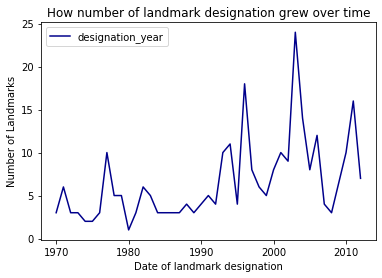

In [33]:
import matplotlib.pyplot as plt
# import plotly.graph_objects as go
import numpy as np

landmark = final_df.groupby(["designation_year"]);
landmark_count = landmark["designation_year"].count()
landmark_count
landmark_count_df=pd.DataFrame(landmark_count)
landmark_count_df.head()
landmark_count_df.plot(kind = "line", title="How number of landmark designation grew over time", color='darkblue')
plt.xlabel("Date of landmark designation")
plt.ylabel("Number of Landmarks")
plt.savefig('./Data/Landmarks.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
##print the landmark info for the first landmark that was recognized 
designation_year_min_df=clean_df.loc[clean_df['designation_year'].idxmin()]
designation_year_min_df

landmark_name                 John J. Glessner House
id                                             L-104
address                            1800 S Prairie Av
designation_year                                1970
start_built_year                                1886
architect                    Henry Hobson Richardson
latitude                                       41.86
longitude                                     -87.62
landmark_designation_date                 1970-10-14
recognize_time                                    84
Name: 43, dtype: object

In [35]:
#print the landmark info for the last landmark that was recognized 
designation_year_max_df=clean_df.loc[clean_df['designation_year'].idxmax()]
designation_year_max_df

landmark_name                (Former) Pioneer Trust and Savings Bank Building
id                                                                      L-318
address                                                    4000 W. North Ave.
designation_year                                                         2012
start_built_year                                                         1924
architect                                                    Karl M. Vitzthum
latitude                                                                41.91
longitude                                                              -87.73
landmark_designation_date                                          2012-06-06
recognize_time                                                             88
Name: 5, dtype: object

In [36]:
##print the landmark info for the first landmark that was built
built_year_min_df=clean_df.loc[clean_df['start_built_year'].idxmin()]
built_year_min_df

landmark_name                   Noble-Seymour-Crippen House
id                                                    L-153
address                                    5624 N Newark Av
designation_year                                       1988
start_built_year                                       1833
architect                    addit 1863, Architects Unknown
latitude                                              41.98
longitude                                             -87.8
landmark_designation_date                        1988-05-11
recognize_time                                          155
Name: 149, dtype: object

In [48]:
##print the landmark info for the last landmark that was built
built_year_max_df=clean_df.loc[clean_df['start_built_year'].idxmax()]
print(built_year_max_df)

landmark_name                Chicago & Western Indiana  Railroad Bridge
id                                                                L-243
address                       Calumet River, 126th St, W of Torrence Av
designation_year                                                   2007
start_built_year                                                   1967
architect                                                James Peterson
latitude                                                          41.67
longitude                                                        -87.56
landmark_designation_date                                    2007-12-12
recognize_time                                                       40
Name: 188, dtype: object


In [39]:
# Convert the data type of column 'Date' from string (YYYY/MM/DD) to datetime64
final_df["landmark_designation_date"] =  pd.to_datetime(df["landmark_designation_date"], format="%Y-%m-%d")
final_df.head(2)

,landmark_name,id,landmark_address,designation_year,start_built_year,recognize_time,architect,latitude,longitude,landmark_designation_date
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1991,1886,105,Adler & Sullivan,41.82,-87.60,1991-10-02 07:00:00+00:00
2,Manhattan Building,L-139,431 S Dearborn St,1978,1891,87,William LeBaron Jenney,41.88,-87.63,1978-07-07 07:00:00+00:00


In [40]:
final_df.dtypes

landmark_name                             object
id                                        object
landmark_address                          object
designation_year                           int64
start_built_year                           int64
recognize_time                             int64
architect                                 object
latitude                                 float64
longitude                                float64
landmark_designation_date    datetime64[ns, UTC]
dtype: object

In [44]:
##print the landmark info for the last landmark that was built
# des_min_df=clean_df.loc[clean_df['andmark_designation_date'].idxmax()]
# des_min_df
print(clean_df.landmark_designation_date.min())

1970-10-14


In [52]:
max_des_date_df= clean_df[clean_df.landmark_designation_date == clean_df.landmark_designation_date.max()]
max_des_date_df


,landmark_name,id,address,designation_year,start_built_year,architect,latitude,longitude,landmark_designation_date,recognize_time
5,(Former) Pioneer Trust and Savings Bank Building,L-318,4000 W. North Ave.,2012,1924,Karl M. Vitzthum,41.91,-87.73,2012-06-06,88
70,Riviera Motor Sales Company Building,L-319,5948-60 N. Braodway,2012,1925,R. Bernard Kurzon,41.99,-87.66,2012-06-06,87


In [53]:
min_des_date_df= clean_df[clean_df.landmark_designation_date == clean_df.landmark_designation_date.min()]
min_des_date_df

,landmark_name,id,address,designation_year,start_built_year,architect,latitude,longitude,landmark_designation_date,recognize_time
43,John J. Glessner House,L-104,1800 S Prairie Av,1970,1886,Henry Hobson Richardson,41.86,-87.62,1970-10-14,84
292,Henry B Clarke House,L- 74,1855 S Indiana Av,1970,1836,Unknown,41.86,-87.62,1970-10-14,134
